## DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPMay21

### Author: Mansi Sharma

### TASK 6: Prediction using Decision Tree Algorithm

### Create the Decision Tree classifier and visualize it graphically.

We will be using iris dataset for this task which consists of 4 features (sepal length, sepal width, petal length and petal width) and 3 species of iris (setosa, versicolor and virginica)

In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz,DecisionTreeClassifier

In [2]:
#load the data
dataset = pd.read_csv("C:/Users/91962/Desktop/DB OF PLACEMENT DRIVES/resume/MY INTERNSHIP/SPARKS FOUNDATION/Iris.csv")
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#to get rows and columns
dataset.shape

(150, 6)

In [4]:
# removing the column Id because there is no need of it 
dataset = dataset.drop(['Id'],axis = 1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# check for null values
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
dataset.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Data Visualisations
### PAIR PLOTS

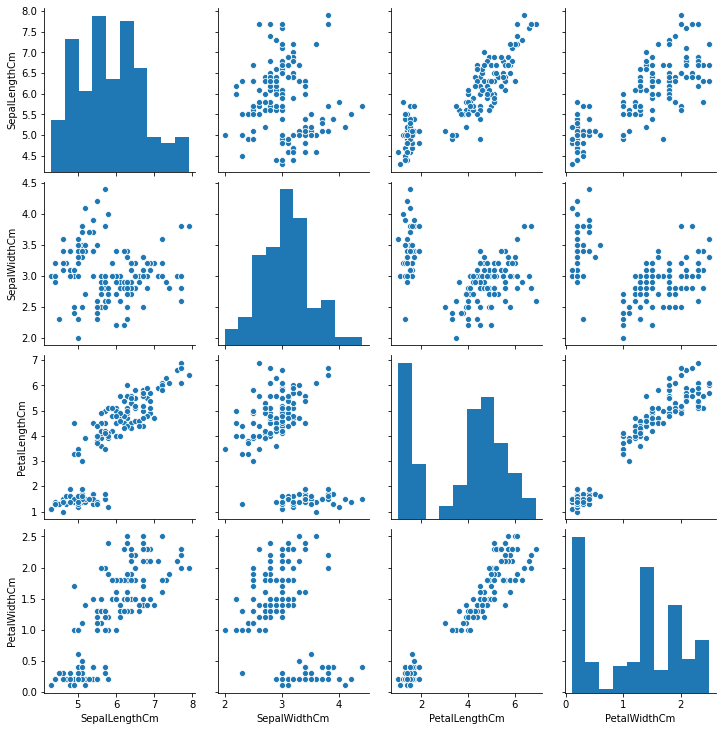

In [7]:
sns.pairplot(dataset)

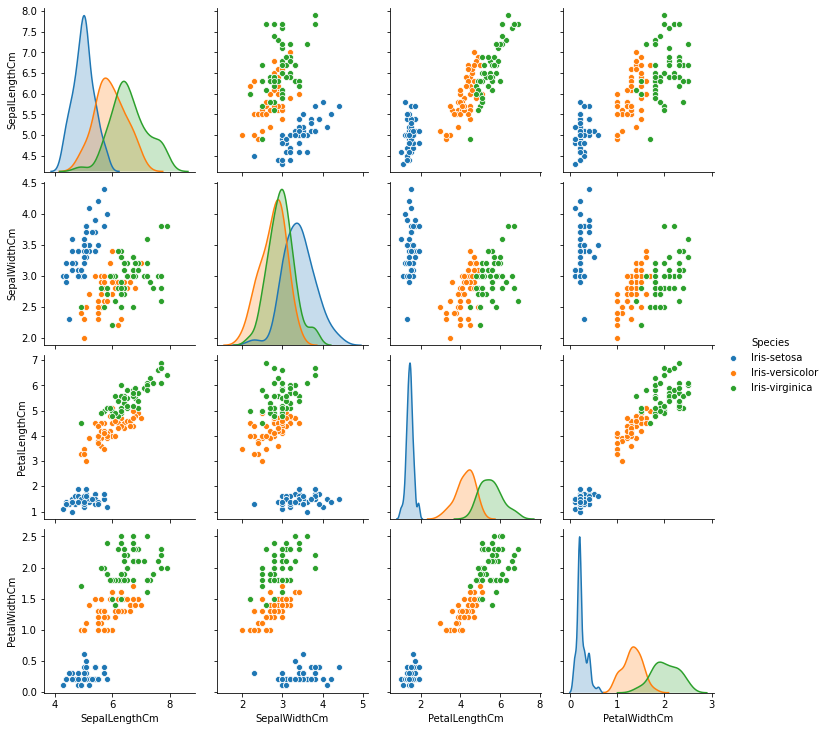

In [8]:
sns.pairplot(dataset,hue='Species')

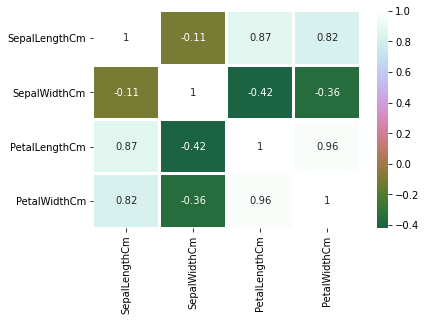

In [9]:
#depict corr between features
sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix',center=0,linewidths=1.9)

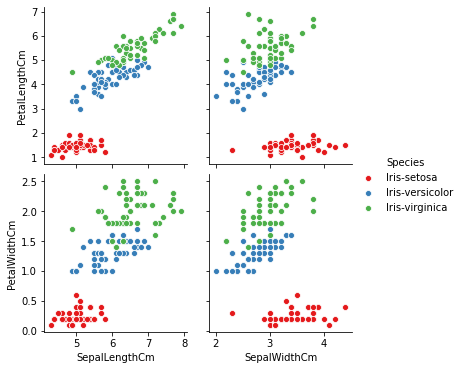

In [10]:
#this plot depicts correlation between sepal length/width to petal length/width
sns.pairplot(dataset,x_vars=['SepalLengthCm','SepalWidthCm'], 
             y_vars=['PetalLengthCm','PetalWidthCm'],hue='Species',palette='Set1')

In [11]:
#Seperating X (Feature matrix) and y (vector of predictions)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [12]:
#We need to perform label encoding on 'y' since ML Algo cannot work on string values
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Train/Test Split


In [13]:
#splitting data into 70% train and 30% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

### Build ML Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
# Accuracy of training set
dt.score(X_train,y_train)

0.9904761904761905

In [16]:
#Making Predictions¶
y_pred = dt.predict(X_test)
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [17]:
# # Comparing Actual vs Predicted Values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,0,0
1,2,2
2,0,0
3,1,1
4,2,2


In [18]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]


0.9777777777777777

### Plot the decision tree model using Graphwiz

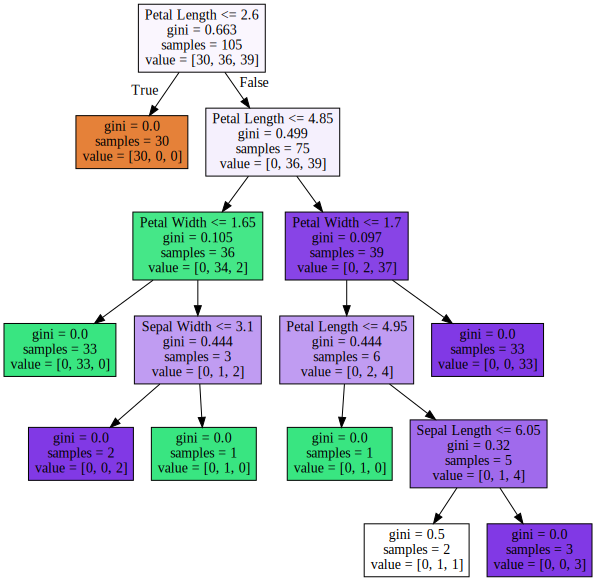

In [19]:
import graphviz 
from sklearn import tree
f = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
c =  ['Setosa', 'Versicolor', 'Virginica']
d = tree.export_graphviz(dt, feature_names = f, filled=True)
dtree = graphviz.Source(d, format="png") 
dtree